# Linear Regression EDA
## Marissa Burton

This file explores how different predictor variables impact the target variables of moisture, body, aftertaste, and flavor in the coffee dataset.

In [42]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [77]:
# Load in data
coffee = pd.read_csv('FINAL_DATA.csv')

In [78]:
coffee

,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Altitude,Species
0,Thailand,1,10,2020,2024-10-29,Washed/Wet,8.67,8.50,8.33,8.00,...,10.0,10.00,0.112,0,0,NaN,0,2025-10-29,1443.0,Arabica
1,Thailand,1,8,2025,2025-07-08,Natural/Dry,8.25,8.50,8.33,8.25,...,10.0,10.00,0.111,0,0,Green,0,2026-07-08,1450.0,Arabica
2,Thailand,1,7,2025,2025-10-02,Natural/Dry,8.42,8.42,8.17,8.17,...,10.0,10.00,0.097,0,0,Green,0,2026-10-02,1375.0,Arabica
3,Thailand,1,8,2025,2025-08-26,Natural/Dry,8.25,8.33,8.25,8.17,...,10.0,10.00,0.129,0,0,Yellow,0,2026-08-26,1200.0,Arabica
4,Thailand,1,7,2021,2025-10-02,Washed/Wet,8.33,8.25,8.08,8.08,...,10.0,10.00,0.095,0,0,Green,3,2026-10-02,1200.0,Arabica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Vietnam,15,30,2025,2025-04-07,Natural/Dry,7.42,7.25,7.17,7.50,...,10.0,7.67,0.123,0,0,Green,0,2026-04-07,550.0,Robusta
398,Brazil,1,60,2024,2024-11-20,Washed/Wet,7.25,7.25,7.08,7.08,...,10.0,7.08,0.106,0,0,Yellow,2,2025-11-20,200.0,Robusta
399,Brazil,1,60,2024,2024-11-20,Natural/Dry,7.00,7.17,7.17,6.92,...,10.0,7.08,0.106,0,0,Brown,2,2025-11-20,232.0,Robusta
400,India,5,60,2023,2024-11-20,Washed/Wet,7.25,6.67,6.83,6.67,...,10.0,6.67,0.108,0,0,Yellow,0,2025-11-20,950.0,Robusta


In [79]:
# Rename columns
coffee = coffee.rename(columns={
    'Country.of.Origin': 'country',
    'Number.of.Bags': 'bag_num',
    'Bag.Weight': 'bag_weight',
    'Harvest.Year': 'harvest_year',
    'Grading.Date': 'grading_date',
    'Processing.Method': 'processing_method',
    'Clean.Cup': 'clean_cup',
    'Category.One.Defects': 'cat_1_defects',
    'Category.Two.Defects': 'cat_2_defects'
})

coffee.columns = [col[0].lower() + col[1:] for col in coffee.columns]

In [80]:
# Check data types
coffee.dtypes

country               object
bag_num                int64
bag_weight             int64
harvest_year           int64
grading_date          object
processing_method     object
aroma                float64
flavor               float64
aftertaste           float64
acidity              float64
body                 float64
balance              float64
uniformity           float64
clean_cup            float64
sweetness            float64
moisture             float64
cat_1_defects          int64
quakers                int64
color                 object
cat_2_defects          int64
expiration            object
altitude             float64
species               object
dtype: object

In [81]:
# Convert object variables to categorical type
coffee['processing_method'] = coffee['processing_method'].astype('category')
coffee['country'] = coffee['country'].astype('category')
coffee['color'] = coffee['color'].astype('category')
coffee['species'] = coffee['species'].astype('category')

### Moisture as Target Variable

In [48]:
coffee[['moisture']].describe()

,moisture
count,402.000000
mean,0.109674
std,0.010524
min,0.081000
25%,0.103000
50%,0.110000
75%,0.116000
max,0.152000


array([[<Axes: title={'center': 'moisture'}>]], dtype=object)

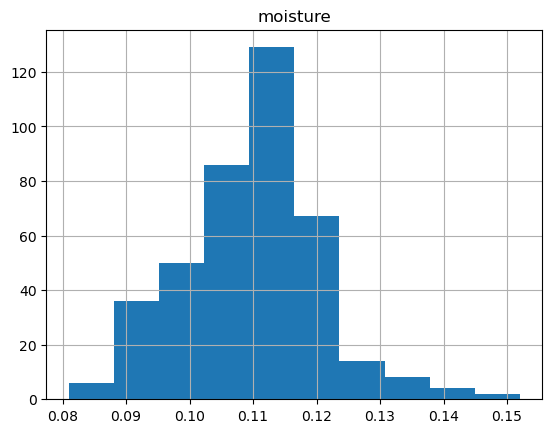

In [49]:
# Histogram of moisture
coffee[['moisture']].hist()

Data is pretty normally distributed with values clustering around 0.11 and 0.12.

In [50]:
# Scatterplot of Acidity vs. Moisture
px.scatter(coffee, x='acidity', y='moisture', trendline='ols')

## Flavor as Target Variable

<Axes: >

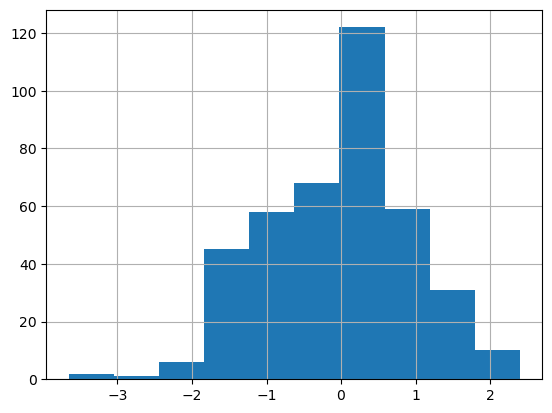

In [55]:
good['flavor'].hist()

<Axes: xlabel='flavor', ylabel='Density'>

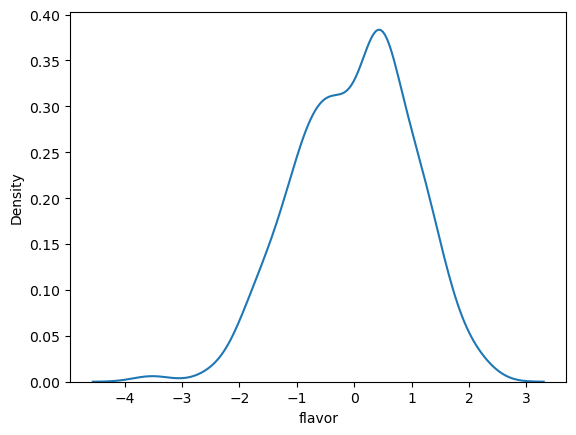

In [56]:
sns.kdeplot(good['flavor'])

There is a slight negative skew, but most values tend to cluster between 7.75 and 8.

## Categorical Variable Impact

### Processing Method

In [57]:
working = coffee
working = working.dropna(subset='processing_method')

In [58]:
# Box plot visualization of processing_method on flavor
px.box(working, x='processing_method', y='flavor')

In [88]:
# Simple Linear Regression for processing_method on flavor
model = smf.ols(formula = 'flavor~processing_method', data=working).fit()
print(model.summary())

# ANOVA for processing_method on flavor
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for processing_method on flavor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['flavor'],              
    groups=working['processing_method'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                 flavor   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     13.57
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.24e-10
Time:                        22:42:53   Log-Likelihood:                -81.495
No. Observations:                 400   AIC:                             173.0
Df Residuals:                     395   BIC:                             192.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

There is a statistically significant difference between the means of the Honey and Natural/Dry group.

### Country

In [62]:
working = coffee.dropna(subset='country')

In [63]:
coffee_grouped_flavor = working.groupby('country')['flavor'].mean().reset_index()
px.bar(coffee_grouped_flavor, x='country', y='flavor')

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_8557/208284807.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Simple Linear Regression for country on flavor
model = smf.ols(formula = 'flavor~country', data=working).fit()
model.summary()

# ANOVA for country on flavor
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for country on flavor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['flavor'],              
    groups=working['country'],
    alpha=0.05
)

print(tukey.summary())

There are several statistically significantly different means between groups.

### Color

In [71]:
working = coffee.dropna(subset='color')

In [72]:
# Box plot visualization of color on flavor
px.box(working, x='color', y='flavor')

In [ ]:
# Simple Linear Regression for color on flavor
model = smf.ols(formula = 'flavor~color', data=working).fit()
print(model.summary())

# ANOVA for color on flavor
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for color on flavor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['flavor'],              
    groups=working['color'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                 flavor   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.566
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.156
Time:                        22:18:02   Log-Likelihood:                -101.33
No. Observations:                 394   AIC:                             216.7
Df Residuals:                     387   BIC:                             244.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.80

Color does not seem like a great predictor of flavor, since there are no statistically significant differences between group means.

### Species

In [85]:
px.violin(working, x='species', y='flavor')

In [82]:
working = coffee.dropna(subset='species')

In [100]:
# Simple Linear Regression for country on flavor
model = smf.ols(formula = 'flavor~species', data=working).fit()
print(model.summary())

# T-test for species on flavor
t_test = model.t_test("species[T.Robusta] = 0")
print(t_test)

                            OLS Regression Results                            
Dep. Variable:                 flavor   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     25.35
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           7.25e-07
Time:                        15:20:55   Log-Likelihood:                -94.617
No. Observations:                 402   AIC:                             193.2
Df Residuals:                     400   BIC:                             201.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7811      0

Robusta coffee beans seem to have better flavors than arabica coffee beans, on average.

### Harvest Year

In [147]:
working = coffee.dropna(subset=['harvest_year', 'flavor'])

In [148]:
px.box(working, x='harvest_year', y='flavor')

In [149]:
# Simple Linear Regression for harvest_year on flavor
model = smf.ols(formula = 'flavor~harvest_year', data=working).fit()
print(model.summary())

# ANOVA for harvest_year on flavor
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for harvest_year on flavor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['flavor'],              
    groups=working['harvest_year'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                 flavor   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7619
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.383
Time:                        21:12:28   Log-Likelihood:                -106.58
No. Observations:                 402   AIC:                             217.2
Df Residuals:                     400   BIC:                             225.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.9649     34.126     -0.644   

## Aftertaste as Target Variable

<Axes: >

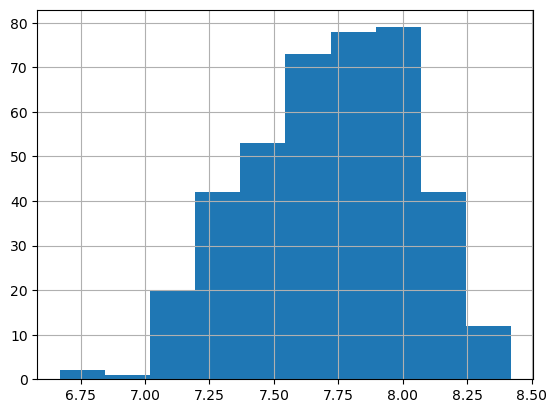

In [ ]:
coffee['aftertaste'].hist()

<Axes: xlabel='aftertaste', ylabel='Density'>

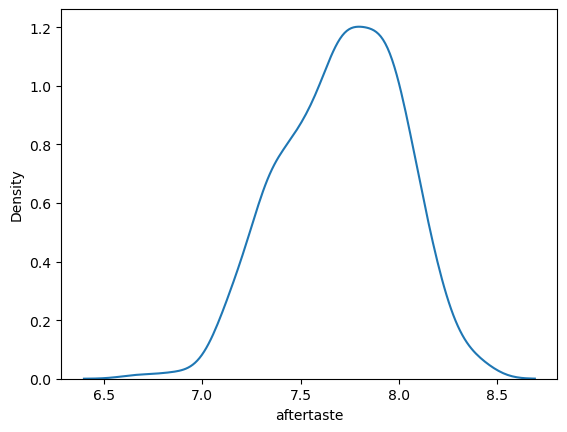

In [ ]:
sns.kdeplot(coffee['aftertaste'])

Observations are pretty normally distributed, with a very, very slight negative skew. Most observations cluster around 8.

## Categorical Variables on Aftertaste

### Processing Method

In [86]:
working = coffee.dropna(subset='processing_method')

In [87]:
px.violin(working, x='processing_method', y='aftertaste')

In [89]:
# Simple Linear Regression for processing_method on aftertaste
model = smf.ols(formula = 'aftertaste~processing_method', data=working).fit()
print(model.summary())

# ANOVA for processing_method on aftertaste
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for processing_method on aftertaste
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['aftertaste'],              
    groups=working['processing_method'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:             aftertaste   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     13.06
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           5.30e-10
Time:                        22:43:46   Log-Likelihood:                -62.633
No. Observations:                 400   AIC:                             135.3
Df Residuals:                     395   BIC:                             155.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Again, there seems to be a statistically significant difference between honey and natural/dry group means.

### Country

In [90]:
working = coffee.dropna(subset='country')

In [92]:
coffee_grouped_flavor = working.groupby('country')['aftertaste'].mean().reset_index()
px.bar(coffee_grouped_flavor, x='country', y='aftertaste')

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_8557/1458279313.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [91]:
# Simple Linear Regression for country on aftertaste
model = smf.ols(formula = 'aftertaste~country', data=working).fit()
print(model.summary())

# ANOVA for country on aftertaste
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for country on aftertaste
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['aftertaste'],              
    groups=working['country'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:             aftertaste   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     7.864
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.44e-21
Time:                        22:50:12   Log-Likelihood:                -6.1035
No. Observations:                 402   AIC:                             62.21
Df Residuals:                     377   BIC:                             162.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Country might be a good predictor of aftertaste, since there are several statistically significantly different group means.

### Color

In [93]:
working = coffee.dropna(subset='color')

In [94]:
px.box(working, x='color', y='aftertaste')

In [95]:
# Simple Linear Regression for color on aftertaste
model = smf.ols(formula = 'aftertaste~color', data=working).fit()
print(model.summary())

# ANOVA for country on aftertaste
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for country on aftertaste
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['aftertaste'],              
    groups=working['color'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:             aftertaste   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.301
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.256
Time:                        23:01:35   Log-Likelihood:                -83.190
No. Observations:                 394   AIC:                             180.4
Df Residuals:                     387   BIC:                             208.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.72

Color does not seem to be a great predictor of aftertaste.

### Species

In [96]:
working = coffee.dropna(subset='species')

In [97]:
px.violin(working, x='species', y='aftertaste')

In [99]:
# Simple Linear Regression for species on aftertaste
model = smf.ols(formula = 'aftertaste~species', data=working).fit()
print(model.summary())

# T-test for species on aftertaste
t_test = model.t_test("species[T.Robusta] = 0")
print(t_test)

                            OLS Regression Results                            
Dep. Variable:             aftertaste   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     41.27
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           3.77e-10
Time:                        23:17:13   Log-Likelihood:                -67.948
No. Observations:                 402   AIC:                             139.9
Df Residuals:                     400   BIC:                             147.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.6605      0

There is a statistically significant difference between group means, so we should consider including species in our final regression model.

### Harvest Year

In [ ]:
working = coffee.dropna(subset=['harvest_year', 'aftertaste'])

In [146]:
# Simple Linear Regression for harvest_year on aftertaste
model = smf.ols(formula = 'aftertaste~harvest_year', data=working).fit()
print(model.summary())

# ANOVA for harvest_year on aftertaste
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for harvest_year on aftertaste
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['aftertaste'],              
    groups=working['harvest_year'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:             aftertaste   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.430
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.120
Time:                        20:52:43   Log-Likelihood:                -86.467
No. Observations:                 402   AIC:                             176.9
Df Residuals:                     400   BIC:                             184.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.8860     32.460     -1.321   

Harvest year is not a good predictor of aftertaste.

## Body as Target Variable

<Axes: >

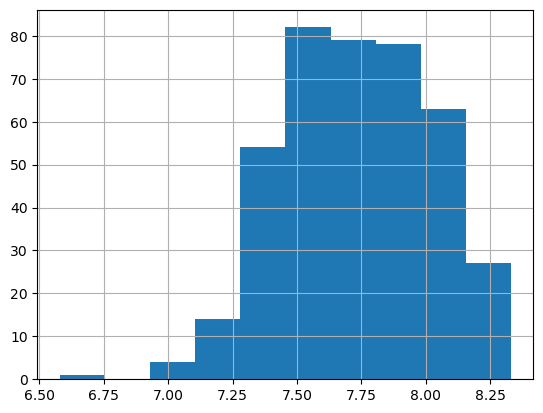

In [ ]:
coffee['body'].hist()

<Axes: xlabel='body', ylabel='Density'>

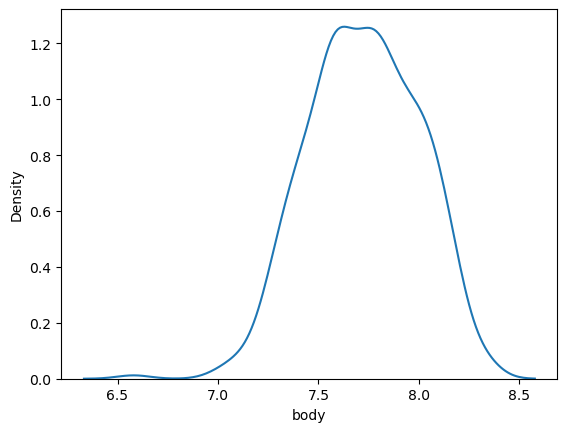

In [ ]:
sns.kdeplot(coffee['body'])

Again, there is a slight negative skew in observations. Most values tend to cluster between 7.5 and 7.75.

### Processing Method

In [101]:
working = coffee.dropna(subset=['processing_method', 'body'])

In [102]:
px.box(working, x='processing_method', y='body')

In [104]:
# Simple Linear Regression for processing_method on body
model = smf.ols(formula = 'body~processing_method', data=working).fit()
print(model.summary())

# ANOVA for processing_method on body
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for processing_method on body
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['body'],              
    groups=working['processing_method'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                   body   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     8.872
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           7.22e-07
Time:                        15:33:14   Log-Likelihood:                -31.894
No. Observations:                 400   AIC:                             73.79
Df Residuals:                     395   BIC:                             93.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Processing method does not seem to be a great predictor of body, although there is a statistically significant difference between group means for the honey and natural/dry groups.

### Country

In [105]:
working = coffee.dropna(subset=['country', 'body'])

In [106]:
coffee_grouped_flavor = working.groupby('country')['body'].mean().reset_index()
px.bar(coffee_grouped_flavor, x='country', y='body')

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_8557/2182393168.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [107]:
# Simple Linear Regression for country on body
model = smf.ols(formula = 'body~country', data=working).fit()
print(model.summary())

# ANOVA for processing_method on body
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for processing_method on body
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['body'],              
    groups=working['country'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                   body   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     6.552
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.82e-17
Time:                        15:35:45   Log-Likelihood:                 21.645
No. Observations:                 402   AIC:                             6.709
Df Residuals:                     377   BIC:                             106.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

There are several group means that are statistically significantly different from each other, so country might be a useful variable to include in the final model.

### Color

In [118]:
working = coffee.dropna(subset=['color', 'body', 'harvest_year'])

In [109]:
px.box(working, x='color', y='body')

In [110]:
# Simple Linear Regression for color on body
model = smf.ols(formula = 'body~color', data=working).fit()
print(model.summary())

# ANOVA for color on body
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for color on body
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['body'],              
    groups=working['color'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                   body   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8769
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.512
Time:                        15:43:36   Log-Likelihood:                -47.555
No. Observations:                 394   AIC:                             109.1
Df Residuals:                     387   BIC:                             136.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.74

Color is not a good predictor of body. There is no statistcially significant differences between group means, so we fail to reject the null hypothesis.

### Species

In [126]:
working = coffee.dropna(subset=['species', 'body'])

In [112]:
px.violin(working, x='species', y='body')

In [113]:
# Simple Linear Regression for species on body
model = smf.ols(formula = 'body~species', data=working).fit()
print(model.summary())

# T-test for species on body
t_test = model.t_test("species[T.Robusta] = 0")
print(t_test)

                            OLS Regression Results                            
Dep. Variable:                   body   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     48.66
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.27e-11
Time:                        15:47:01   Log-Likelihood:                -25.349
No. Observations:                 402   AIC:                             54.70
Df Residuals:                     400   BIC:                             62.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.6760      0

Again, species seems to be a good predictor of our target variable (body in this case). We reject the null hypothesis here and accept the alternative hypothesis that the is a statistically significant difference between group means.

In [125]:
px.scatter(working, x='harvest_year', y='body', trendline='ols')

In [121]:
# Simple Linear Regression for harvest_year on body
model = smf.ols(formula = 'body~harvest_year', data=working).fit()
print(model.summary())

# ANOVA for harvest_year on body
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)

# Tukey HSD for harvest_year on body
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=working['body'],              
    groups=working['harvest_year'],
    alpha=0.05
)

print(tukey.summary())

                            OLS Regression Results                            
Dep. Variable:                   body   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.695
Date:                Tue, 18 Nov 2025   Prob (F-statistic):             0.0100
Time:                        16:01:08   Log-Likelihood:                -46.879
No. Observations:                 394   AIC:                             97.76
Df Residuals:                     392   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -74.6125     31.821     -2.345   

## Impact of Numeric Variables on Target Variables

In [ ]:
# Dataset with only numeric variables
coffee_numeric = coffee.drop(['country', 'grading_date', 'color', 'species', 'processing_method', 'expiration'], axis=1)

In [ ]:
# Create correlation matrix between all numeric variables
corr = coffee_numeric.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale="Picnic", zmin=-1, zmax=1)
fig.show()

Moisture is not very highly correlated with any other variable. However, this tells us which variables may be more related. Aroma, Flavor, Aftertaste, Acidity, Body, and Balance all seem to be related. I'll focus on how predictors impact Flavor, Aftertaste, and Body.

In [ ]:
# Create df for numeric variables on a scale (0-10)
scale_scored = coffee[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']]

# Observe Standard Deviation
scale_scored.std()

aroma         0.309717
flavor        0.316129
aftertaste    0.301323
acidity       0.303884
body          0.273285
balance       0.296937
dtype: float64

In [ ]:
# Observe Variance
scale_scored.var()

aroma         0.095924
flavor        0.099937
aftertaste    0.090795
acidity       0.092345
body          0.074685
balance       0.088172
dtype: float64

In [ ]:
px.scatter_matrix(scale_scored)

The matrix of scatterplots all represent strong, positive relationships between scale_scored variables. However, since the majority of observations for these variables are between a sensory score of 6 to 10, range restriction is present; there is less variability (variance is <0.25 for all variables) in our data, and the standard deviations for these variables are all <0.5 before standardizing, which indicates tight clustering.

In [ ]:
# Standardize values
scaler = StandardScaler()
standard_cols = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance']
scale_scored[standard_cols] = scaler.fit_transform(scale_scored[standard_cols])
corr = scale_scored.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale="Picnic", zmin=-1, zmax=1)
fig.show()

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_8557/3863140513.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = scale_scored[standard_cols]      
X = sm.add_constant(X)      


vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]

print(vif)

     Variable       VIF
0       const  1.000000
1       aroma  4.867919
2      flavor  9.308822
3  aftertaste  7.829815
4     acidity  6.613071
5        body  6.280959
6     balance  7.313335


After standardizing values, I checked each VIF score because the high correlations indicate the presence of multicolinearity. Keeping in mind that a VIF > 5 indicates multicolinearity might be present and a VIF > 10 means there is definitely multicolinearity present, in the flavor variable especially (with a VIF of about 9.3). However, this does not mean I have to throw away this data; it simply means that no more than 2 of these scale score variables should be used as predictors in the same model (to avoid multicolinearity).

## Conclusions